In [1]:
import math
import numpy as np
import pandas as pd
from numba import njit
from numba import jit
!python -m pip install yfinance
import yfinance as yf
import time
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
plot_width = 15
plot_length = 3
short_lookback = 5
long_lookback = 8

In [3]:
extract_obj = yf.Ticker("AAPL")
data = extract_obj.history(period="1y")
data['Typical Price'] = ((data['High'] + data['Low'] + data['Close']) / 3).round(2)
data = data.iloc[-50:]
price_list = np.array(data['Typical Price'])

In [4]:
#price_list - numpy array list
#lookback - integer
def mcg(price_array, lookback):
    out_array = np.array([None for i in range(lookback)])
    
    sum_var = np.sum(price_array[0:lookback])
    base_val = (sum_var/lookback)
    out_array = np.append(out_array,base_val)
    
    for i in range(price_array.size - lookback - 1):
        price_t = price_array[i + lookback + 1]
        add_val = (price_t - base_val)
        frac = (price_t/base_val)**4 
        denom = frac*lookback
        out_val = base_val + add_val/denom
        
        out_array = np.append(out_array,out_val)
        base_val = out_val
    return out_array


In [5]:
start = time.time()
x1 = mcg(price_list,short_lookback)
x2 = mcg(price_list,long_lookback)
end = time.time()
print(x1)
function_time = end - start

[None None None None None 122.744 122.65390343660228 122.67504948830835
 122.27846676941623 121.83555614982636 121.51908983748979
 121.48710470198209 121.06713702854596 121.26119920745948
 121.59148971968169 122.17454819313502 122.8694346650865
 123.55787614784515 124.54814145271172 125.68091332949358
 126.63129947393558 127.73695936223187 128.58481140021775
 129.5243310404737 130.2768193655219 130.99240068640364 131.41583054818256
 131.64803590984621 131.77203062878263 132.12517056387264
 132.5185865195036 132.87602172912378 133.0310779834145 133.24000174774008
 132.94138673172907 132.87036142949404 131.86077158860587
 131.14478176732257 130.60598193249467 130.54828183038646
 129.9332077737884 128.77593669000012 127.45037075068419
 126.95090465588302 126.97264888463508 126.7974605859216
 126.53573986781414 126.02316784137837 126.15758002061806
 126.16804660967867]


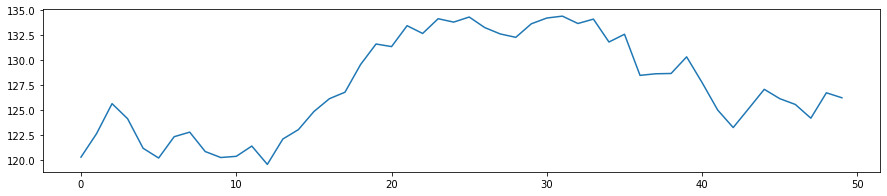

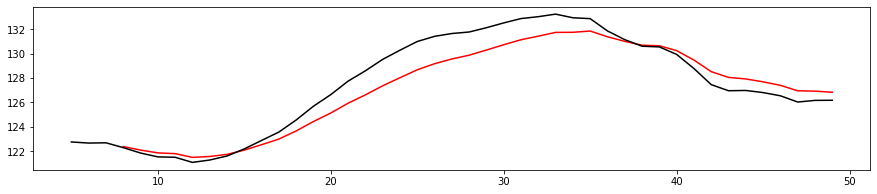

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x2.size), x2, color = 'red')
plt.plot(np.arange(x1.size), x1, color = 'black')
plt.show()

In [7]:
def mcg_mcg_osc_gen(price_array, short_lookback, long_lookback):
    out_array = np.array([None for i in range(long_lookback)])
    
    def mcg(price_array, lookback):
        out_array = np.array([None for i in range(lookback)])

        sum_var = np.sum(price_array[0:lookback])
        base_val = (sum_var/lookback)
        out_array = np.append(out_array,base_val)

        for i in range(price_array.size - lookback - 1):
            price_t = price_array[i + lookback + 1]
            add_val = (price_t - base_val)
            frac = (price_t/base_val)**4 
            denom = frac*lookback
            out_val = base_val + add_val/denom

            out_array = np.append(out_array,out_val)
            base_val = out_val
        return out_array
    
    out_arr = np.subtract(mcg(price_array, short_lookback)[long_lookback:], mcg(price_array, long_lookback)[long_lookback:])
    out_array = np.append(out_array,out_arr)
    return out_array

In [8]:
start = time.time()
osc = mcg_mcg_osc_gen(price_array = price_list, short_lookback = short_lookback, long_lookback = long_lookback)
end = time.time()
print(osc)
oscillator_time = (end-start)

[None None None None None None None None -0.08903323058378021
 -0.24236770780538563 -0.32736898546394855 -0.2975659308188199
 -0.4123766812141696 -0.29070744529899173 -0.1341893212056675
 0.09801261590398269 0.349232652295953 0.5741811612018921
 0.8986465437982503 1.2561279112437802 1.5094855472679427
 1.8106598855570297 1.9743118178465267 2.1660602067713626
 2.2567276376346683 2.3224875087825296 2.2472169788960343
 2.0911866135212733 1.9019635172356857 1.8348280002002184
 1.792085123241435 1.7375188758884121 1.5994368416476448
 1.4995203871590377 1.1922338593270183 1.0187436144504147 0.47968353901868
 0.13943392028218682 -0.08278698681451147 -0.09386699907099683
 -0.3105723712888562 -0.6918221522909676 -1.0655655763484333
 -1.0940858360696097 -0.9453552643771275 -0.8826999175012702
 -0.8581864242072896 -0.9227273049594089 -0.7586080362782468
 -0.6578756145559055]


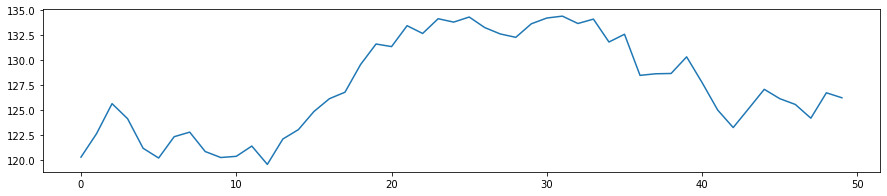

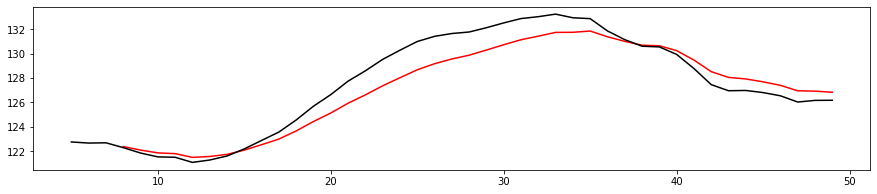

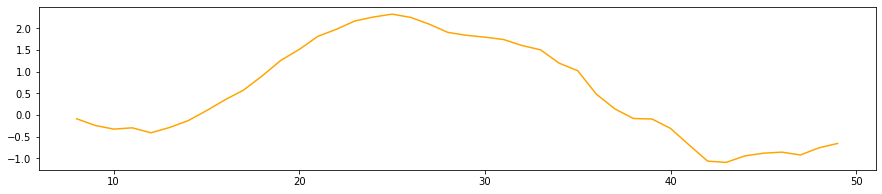

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x2.size), x2, color = 'red')
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(osc.size), osc, color = 'orange')
plt.show()

In [10]:
def signal_generation(oscillator_array, long_lookback):
    out_array = np.array([0 for i in range(long_lookback + 1)])
    start_val = long_lookback + 1
    for i in range(start_val, oscillator_array.size):
        append_val = 0
        if (oscillator_array[i] > 0 and oscillator_array[i - 1]  <= 0):
            append_val = oscillator_array[i] - oscillator_array[i - 1]
        elif (oscillator_array[i] < 0 and oscillator_array[i - 1]  >= 0):
            append_val = oscillator_array[i] - oscillator_array[i - 1]
        out_array = np.append(out_array, append_val)
    return out_array

In [11]:
start = time.time()
sign_gen = signal_generation(oscillator_array = osc, long_lookback = long_lookback)
end = time.time()
print(sign_gen)
signal_time = end - start

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.23220194  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.22222091  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


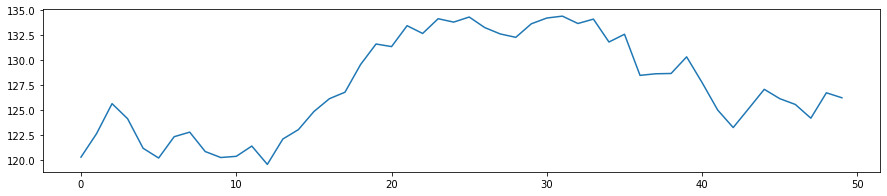

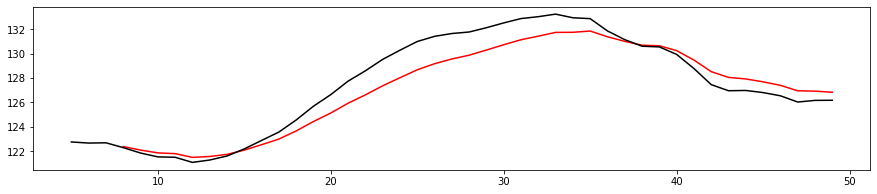

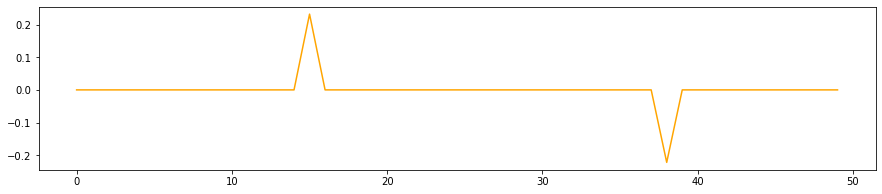

In [12]:
figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x2.size), x2, color = 'red')
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(sign_gen.size), sign_gen, color = 'orange')

plt.show()

In [13]:
def signum_generation(signal_array, sensitivity = 1.5):
    out_arr = np.empty(0)
    std = np.std(signal_array)
    for i in signal_array:
        append_val = 0
        if (i > std*sensitivity):
            append_val = 100
        elif (i < -std*sensitivity):
            append_val = -100
        out_arr = np.append(out_arr, append_val)
    return out_arr

In [14]:
start = time.time()
signum_gen = signum_generation(sign_gen)
end = time.time()
print(signum_gen)
signum_time = end - start

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.  100.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0. -100.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.]


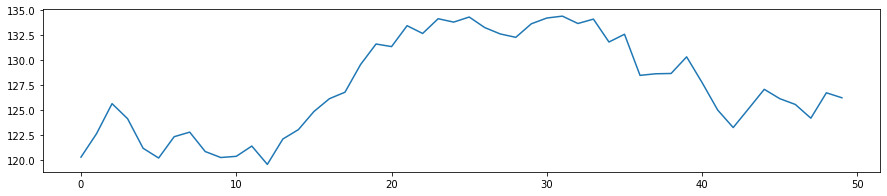

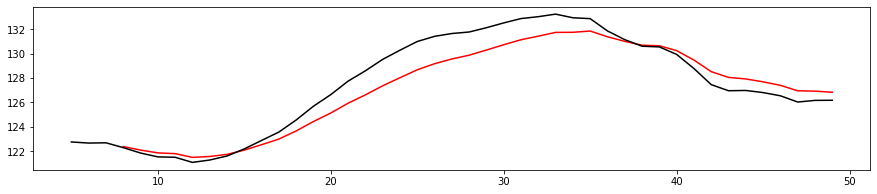

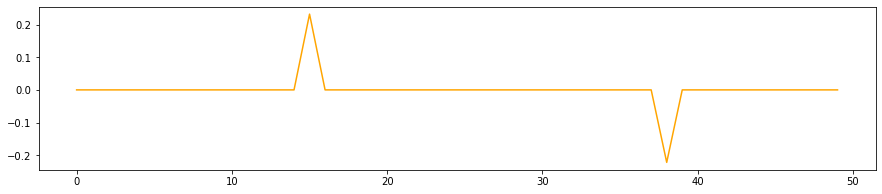

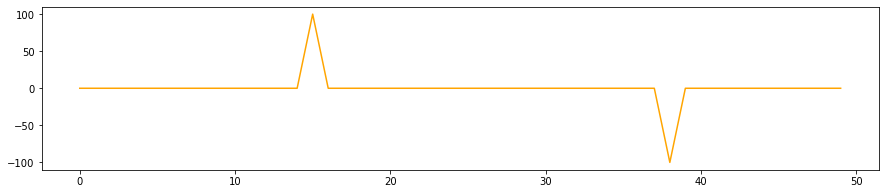

In [15]:
figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x2.size), x2, color = 'red')
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(sign_gen.size), sign_gen, color = 'orange')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(signum_gen.size), signum_gen, color = 'orange')

plt.show()

In [16]:
def current_bias(signal_array, signum_array):
    bias = 0
    bias_list = []
    for i,j in zip(signal_array,signum_array):
        if (bias == 0):
            if (j == 100):
                bias = 100
            elif(j == -100):
                bias = -100
        elif(bias == -100):
            if (j == 100 and i > 0):
                bias = 100
            elif(j != 100 and i > 0):
                bias = 0
        elif(bias == 100):
            if (j == -100 and i < 0):
                bias = -100
            elif (j != -100 and i < 0):
                bias = 0
        bias_list.append(bias)
    bias_array = np.array(bias_list)
    return bias_array

In [17]:
start = time.time()
bias_array = current_bias(signal_array = sign_gen, signum_array = signum_gen)
end = time.time()
bias_time = end - start
print(bias_array)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0  100  100  100  100  100  100  100  100  100  100  100  100  100
  100  100  100  100  100  100  100  100  100  100 -100 -100 -100 -100
 -100 -100 -100 -100 -100 -100 -100 -100]


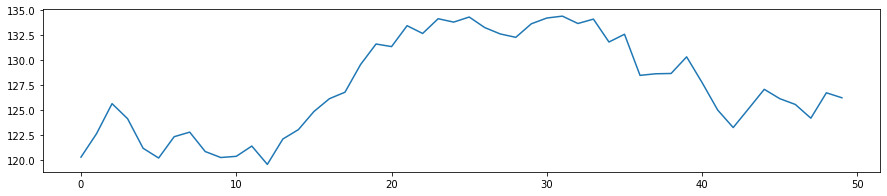

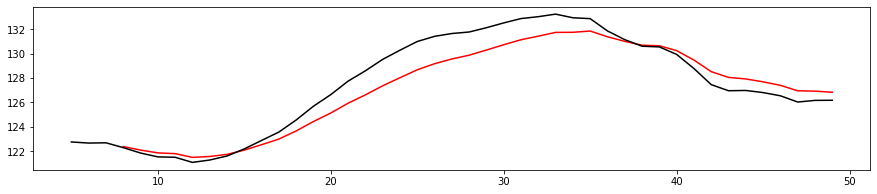

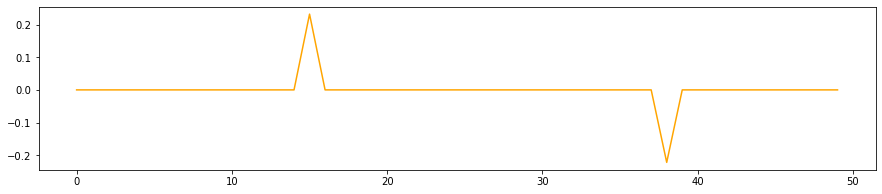

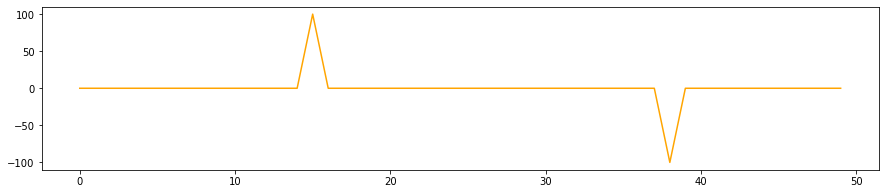

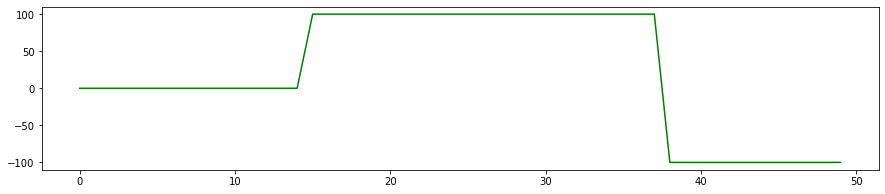

In [18]:
figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x2.size), x2, color = 'red')
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(sign_gen.size), sign_gen, color = 'orange')

figure(figsize=(plot_width, plot_length))
ax4 = plt.subplot()
plt.plot(np.arange(signum_gen.size), signum_gen, color = 'orange')

figure(figsize=(plot_width, plot_length))
ax5 = plt.subplot()
plt.plot(np.arange(bias_array.size), bias_array, color = 'green')

plt.show()

In [19]:
def efficacy_generator (price_array,signum_array, bias_array, stop_loss_percent = 0.3):
    long_book = [0 for i in range(price_array.size)]
    short_book = [0 for i in range(price_array.size)]
    long_pos = []
    short_pos = []
    long_positions = []
    short_positions = []
    long_cash = 0
    short_cash = 0
    stop_loss_flag = False
    short_position_flag = False
    long_position_flag = False
    sub_stop = (max(price_array) - min(price_array))*stop_loss_percent
    
    ctr = 0
    for i,j,k in zip(price_array, bias_array,signum_array):
        if (stop_loss_flag):
            if(k == 100 or k == -100):
                stop_loss_flag = False                 
        elif (stop_loss_flag == False  and short_position_flag == False and long_position_flag == False):
            if(j == 100):
                long_position_flag = True
                long_pos.append(i)
                long_book[ctr] = i
            elif(j == -100):
                short_position_flag = True
                short_pos.append(i)
                short_book[ctr] = i
        elif(stop_loss_flag == False  and short_position_flag == True):
            short_pos.append(i)
            short_book[ctr] = i
            if (i > (min(short_pos) + sub_stop)):
                short_position_flag = False
                stop_loss_flag = True
                short_positions.append(short_pos)
                short_pos = []
            elif(j == 100):
                short_position_flag = False
                long_position_flag = True
                short_positions.append(short_pos)
                short_pos = []
            elif(j == 0):
                short_position_flag = False
                short_positions.append(short_pos)
                short_pos = []
        elif(stop_loss_flag == False and long_position_flag == True):
            long_pos.append(i)
            long_book[ctr] = i
            if (i < (max(long_pos) - sub_stop)):
                long_position_flag = False
                stop_loss_flag = True
                long_positions.append(long_pos)
                long_pos = []
            elif (j == 0):
                long_position_flag = False
                long_positions.append(long_pos)
                long_pos = []
            elif(j == -100):
                long_position_flag = False
                short_position_flag = True
                long_positions.append(long_pos)
                long_pos = []
                
        ctr += 1
        
    if (long_pos != []):
        long_positions.append(long_pos)
    if (short_pos != []):
        short_positions.append(short_pos)
    
    for i in long_positions:
        long_cash += (i[-1] - i[0])
    for i in short_positions:
        short_cash += (i[0] - i[-1])
    
    out = (long_cash+short_cash)/sub_stop
    print(out)
    return long_book,short_book

In [20]:
start = time.time()
test = efficacy_generator(price_array = price_list, signum_array = signum_gen, bias_array = bias_array)
end = time.time()
efficacy_time = end - start
print(test)

1.732706514439223
([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 124.83, 126.12, 126.77, 129.54, 131.61, 131.35, 133.45, 132.67, 134.15, 133.81, 134.32, 133.26, 132.62, 132.28, 133.64, 134.22, 134.41, 133.67, 134.11, 131.81, 132.59, 128.46, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 130.32, 127.73, 124.98, 123.22, 125.13, 127.06, 126.12, 125.54, 124.16, 126.71, 126.21])


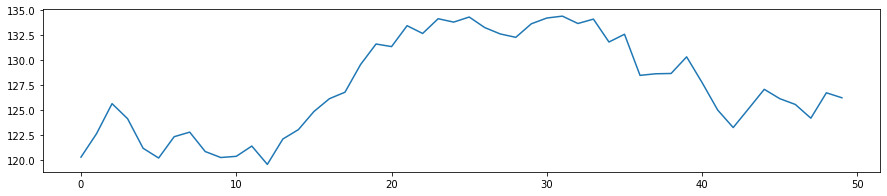

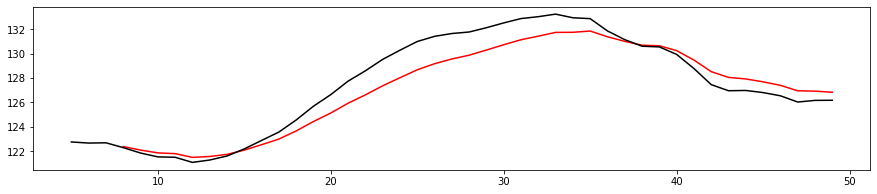

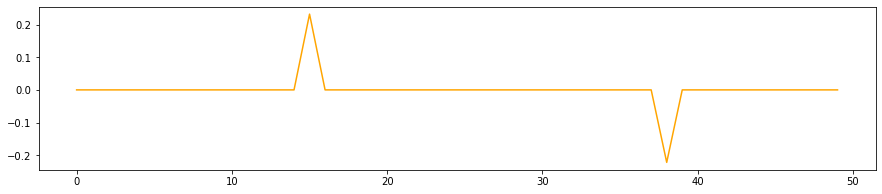

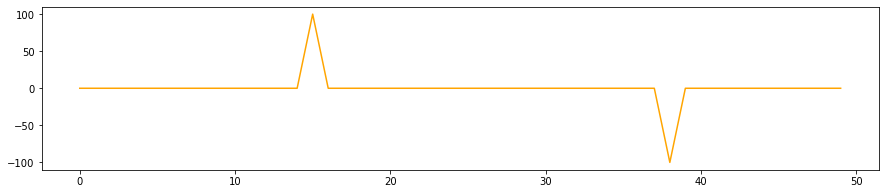

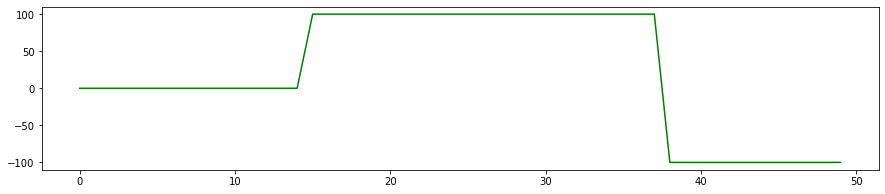

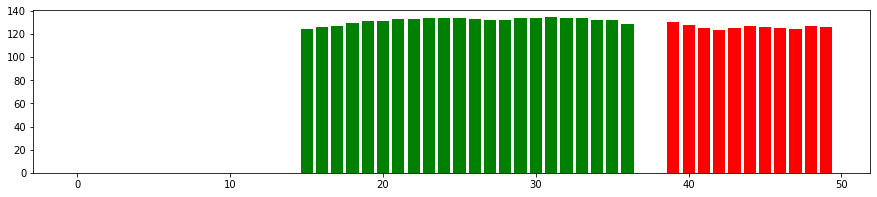

In [21]:
figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x2.size), x2, color = 'red')
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(sign_gen.size), sign_gen, color = 'orange')

figure(figsize=(plot_width, plot_length))
ax4 = plt.subplot()
plt.plot(np.arange(signum_gen.size), signum_gen, color = 'orange')

figure(figsize=(plot_width, plot_length))
ax5 = plt.subplot()
plt.plot(np.arange(bias_array.size), bias_array, color = 'green')

figure(figsize=(plot_width, plot_length))
ax6 = plt.subplot()
plt.bar(np.arange(bias_array.size), test[0], color = 'green')
plt.bar(np.arange(bias_array.size), test[1], color = 'red')

plt.show()

In [22]:
print(
    "Diagnostics \n" +
    "Function Load Time: " + str(function_time) + "\n" + 
    "Oscillator Load Time: " + str(oscillator_time) + "\n" + 
    "Signal Load Time: " + str(signal_time) + "\n" + 
    "Signum Load Time: " + str(signum_time) + "\n" 
    "Bias Load Time: " + str(bias_time) + "\n" + 
    "Efficacy Value Load time: " + str(efficacy_time) + "\n"
    "Total Time: " + str(function_time+oscillator_time+signal_time+signum_time+bias_time+efficacy_time)
    )

Diagnostics 
Function Load Time: 0.00599980354309082
Oscillator Load Time: 0.00499415397644043
Signal Load Time: 0.0029973983764648438
Signum Load Time: 0.0029985904693603516
Bias Load Time: 0.0
Efficacy Value Load time: 0.0019974708557128906
Total Time: 0.018987417221069336
